# Анализ однородных открытых экспоненциальных сетей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def expected_n(lmbd, mu):
    return lmbd / (mu - lmbd)

In [3]:
def expected_u(lmbd, mu):
    return 1 / (mu - lmbd)

In [4]:
def stationary_distribution(omega, theta, eps):
    while np.linalg.norm(omega.dot(theta) - omega) > eps:
        omega = omega.dot(theta)
    return omega

In [5]:
def get_lmbds(lmbd_0, omega):
    ans = [lmbd_0 * omega[1] / omega[0]]
    for i in range(2, L + 1):
        ans.append(lmbd_0 * omega[i] / omega[0])
    return ans

In [6]:
# коэффициенты использования систем
def get_psi(lmbds, kappa, mu):
    psi = np.zeros(L)
    for i in range(L):
        psi[i] = lmbds[i]/(kappa[i]*mu[i])
    return psi

In [7]:
def get_properties(L, lmbd_0, kappa, psi, lmbds, mu):
    P_i0 = np.zeros(L)
    b_i = np.zeros(L) # м.о. числа требований в очереди
    h_i = np.zeros(L) # м.о. числа занятых приборов
    n_i = np.zeros(L) # м.о. числа требований в системе
    u_i = np.zeros(L) # м.о. длительности пребывания требования в системе
    tau = 0 # длительность реакции
    tc = 0 # пропускная способность сети
    for i in range(L):
        summary = 0
        for j in range(kappa[i]):
            summary += (kappa[i]*psi[i])**j / math.factorial(j)
        P_i0[i] = ((((kappa[i]*psi[i])**kappa[i]) / (math.factorial(kappa[i]) * (1 - psi[i]))) + summary)**(-1)
        b_i[i] = P_i0[i] * (((kappa[i]**kappa[i])*(psi[i]**(kappa[i]+1))) / (math.factorial(kappa[i])*((1-psi[i])**2)))
        h_i[i] = psi[i] * kappa[i]
        n_i[i] = expected_n(lmbds[i], mu[i])
        u_i[i] = expected_u(lmbds[i], mu[i])
        tau += lmbds[i]*u_i[i]
    tau *= (1/lmbd_0)
    tc = sum(lmbds)
    return tau, P_i0, b_i, h_i, n_i, u_i, tc

## Задача 1

In [8]:
L = 7
kappa = [1] * L
mu = np.array([140, 65, 90, 143, 160, 184, 183])
theta = np.array([[0, 0.3, 0, 0.08, 0.02, 0.3, 0.3, 0],
                  [0, 0, 0.5, 0, 0, 0.2, 0.3, 0],
                  [0.4, 0.3, 0, 0, 0.2, 0, 0.1, 0],
                  [0, 0.8, 0, 0, 0.01, 0, 0.14, 0.05],
                  [0.4, 0, 0, 0.1, 0, 0.2, 0.3, 0],
                  [0, 0, 0.1, 0.1, 0, 0, 0.5, 0.3],
                  [0, 0, 0, 0.9, 0.1, 0, 0, 0],
                  [0, 0, 0, 0.6, 0.2, 0, 0.1, 0.1]])

In [9]:
# нахождение вектора omega
omega = np.array([0.3, 0.4, 0, 0, 0, 0.3, 0, 0])
eps = 0.0001
omega = stationary_distribution(omega, theta, eps)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.07098087 0.22950826 0.1225322  0.21432427 0.05485315 0.07813727
 0.19170433 0.03795966],
Check (~1): 1.0000000000000002


In [10]:
# изменение параметров
# изменения интенсивности входящего в сеть потока
lmbds_to_plot = np.linspace(0.1, 25, 10)
n_s_s = []
u_s_s = []
for lmbd_0 in lmbds_to_plot:
    lmbds = get_lmbds(lmbd_0, omega)
    n_s = expected_n(lmbds, mu)
    u_s = expected_u(lmbds, mu)
    n_s_s.append(n_s)
    u_s_s.append(u_s)
    # print(f'\nlambda_0: {lmbd_0}\nN: {n_s},\nU: {u_s}')
n_s_s = np.array(n_s_s)
u_s_s = np.array(u_s_s)
n_s_s = np.transpose(n_s_s)
u_s_s = np.transpose(u_s_s)

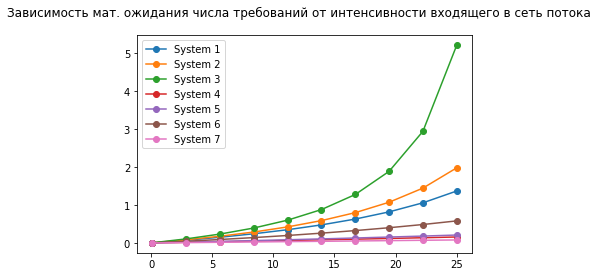

In [11]:
for i, n_s in enumerate(n_s_s):
    plt.plot(lmbds_to_plot, n_s, 'o-', label=f'System {str(i + 1)}')
plt.legend()
plt.suptitle(f'Зависимость мат. ожидания числа требований от интенсивности входящего в сеть потока')
plt.show()

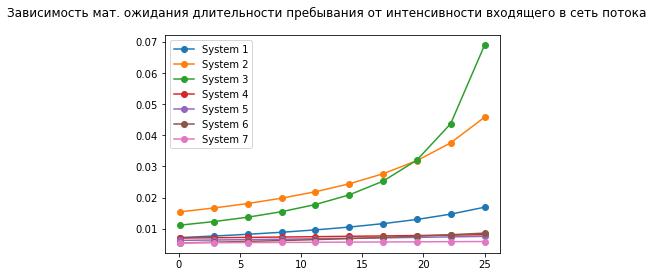

In [12]:
for i, u_s in enumerate(u_s_s):
    plt.plot(lmbds_to_plot, u_s, 'o-', label=f'System {str(i + 1)}')
plt.legend()
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности входящего в сеть потока')
plt.show()

In [13]:
# интенсивность обслуживания в 4-й системе
mu_to_plot = np.linspace(100, 200, 20)
n_s_s = []
u_s_s = []
lmbd_0 = 4
lmbds = get_lmbds(lmbd_0, omega)
for mu_4 in mu_to_plot:
    mu[3] = mu_4
    n_s = expected_n(lmbds, mu)
    u_s = expected_u(lmbds, mu)
    n_s_s.append(n_s)
    u_s_s.append(u_s)
    # print(f'\nmu_4: {mu_4}\nN: {n_s},\nU: {u_s}')
n_s_s = np.array(n_s_s)
u_s_s = np.array(u_s_s)
n_s_s = np.transpose(n_s_s)
u_s_s = np.transpose(u_s_s)

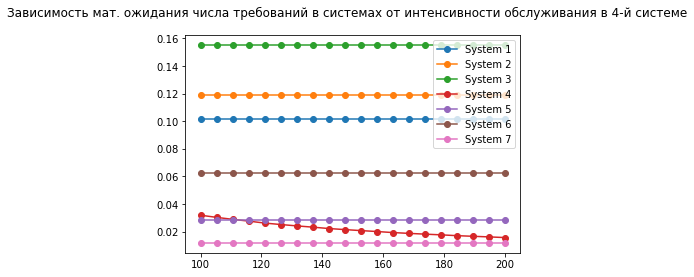

In [14]:
for i, n_s in enumerate(n_s_s):
    plt.plot(mu_to_plot, n_s, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания числа требований в системах от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

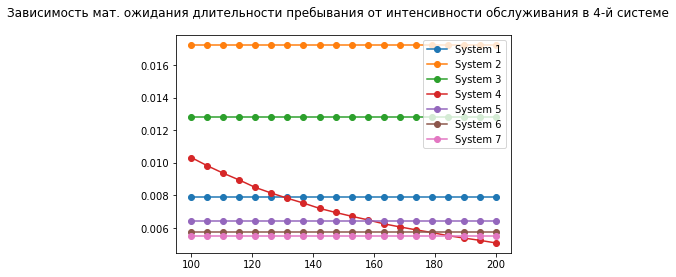

In [15]:
for i, u_s in enumerate(u_s_s):
    plt.plot(mu_to_plot, u_s, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

## Задача 2

### A) Нахождение маршрутной матрицы для минимизации времени реакции сети

In [52]:
L = 6
kappa = [1] * L
mu = np.array([2, 3, 7, 5, 10, 11])
theta = np.array([[0, 0.3, 0, 0, 0.7, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0.2, 0, 0.8, 0],
                  [0, 0, 0, 0, 0, 0.6, 0.4],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0.1, 0, 0, 0.9],
                  [1, 0, 0, 0, 0, 0, 0]])

In [53]:
print(f'Начальная маршрутная матрица:\n{theta}')

Начальная маршрутная матрица:
[[0.  0.3 0.  0.  0.7 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.  0.8 0. ]
 [0.  0.  0.  0.  0.  0.6 0.4]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.9]
 [1.  0.  0.  0.  0.  0.  0. ]]


In [54]:
tau_min = 100
s = 0.1
prob_arr = np.arange(0.1, 1, s)
eps = 0.001
omega = np.array([0.3, 0.4, 0, 0, 0, 0.3, 0])

In [55]:
# возможно тут стоило вставить метод градиентного спуска...
for l0 in prob_arr:
    for l2 in prob_arr:
        for l3 in prob_arr:
            for l5 in prob_arr:
                theta[0,1] = l0
                theta[0,4] = 1 - l0
                theta[2,3] = l2
                theta[2,5] = 1 - l2
                theta[3,5] = l3
                theta[3,6] = 1 - l3
                theta[5,3] = l5
                theta[5,6] = 1 - l5

                omega = stationary_distribution(omega, theta, eps)
                tmp_lmbds = get_lmbds(lmbd_0, omega)
                if all(get_psi(tmp_lmbds, kappa, mu) < 1):
                    lmbds = tmp_lmbds
                tc_ans = sum(lmbds)
                tmp_psi = get_psi(lmbds, kappa, mu)
                tau_ans, *_ = get_properties(L, lmbd_0, kappa, tmp_psi, lmbds, mu)
                if tau_ans < tau_min and tau_ans > 0: 
                    tau_min = tau_ans
                    theta_min = theta
                    print(f"Маршрутная матрица:\n{theta_min}\nВремя реакции сети: {tau_min}\nПропускная способность сети: {tc_ans}")

Маршрутная матрица:
[[0.  0.1 0.  0.  0.9 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.1 0.9]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.9]
 [1.  0.  0.  0.  0.  0.  0. ]]
Время реакции сети: 0.46953124428859083
Пропускная способность сети: 1.5581009838132829
Маршрутная матрица:
[[0.  0.1 0.  0.  0.9 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.  0.8 0. ]
 [0.  0.  0.  0.  0.  0.1 0.9]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.9]
 [1.  0.  0.  0.  0.  0.  0. ]]
Время реакции сети: 0.46722394009958756
Пропускная способность сети: 1.551169821680079


### Б) Нахождение вектора интенсивностей обслуживания при заданном значении пропускной способности сети

In [20]:
L = 6
R = 8
kappa = [1] * L
lmbd_0 = 0.5
mu = np.array([1., 3., 1., 5., 2., 1.])
theta = np.array([[0, 0.3, 0.3, 0, 0.4, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0.2, 0, 0.8, 0],
                  [0, 0, 0, 0, 0, 0.6, 0.4],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0.1, 0, 0, 0.9],
                  [1, 0, 0, 0, 0, 0, 0]])

In [21]:
omega = np.array([0, 0, 0.5, 0, 0, 0.5, 0])
eps = 0.0001
omega = stationary_distribution(omega, theta, eps)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.22932733 0.06878422 0.06878422 0.10339045 0.09171229 0.20873505
 0.22926645],
Check (~1): 1.0000000000000013


In [22]:
# поиск нужного l_0
tmp = lmbd_0
h = 0.01
tc = sum(get_lmbds(tmp, omega))
while math.fabs(tc - R) > h:
    tc = sum(get_lmbds(tmp, omega))
    tmp += h
lmbds = get_lmbds(tmp, omega)

# поиск mu
h = 0.01
index = 0
while np.linalg.norm(mu - lmbds) < 0:
    mu[index % 6] += h
    index += 1
print(f"\nВектор mu: {mu}\nCумма равна: {sum(mu)}\nВектор lambda: {lmbds}\nПропускная способность: {tc}\nМаршрутная матрица:\n{theta}")


Вектор mu: [1. 3. 1. 5. 2. 1.]
Cумма равна: 13.0
Вектор lambda: [0.7168543078045732, 0.7168543078045732, 1.0775129402685657, 0.955805743739431, 2.175391657686721, 2.3893654770294903]
Пропускная способность: 7.998178641721083
Маршрутная матрица:
[[0.  0.3 0.3 0.  0.4 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.  0.8 0. ]
 [0.  0.  0.  0.  0.  0.6 0.4]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.9]
 [1.  0.  0.  0.  0.  0.  0. ]]
